In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_train = pd.read_excel('/content/drive/MyDrive/Asssignment4_Data.xlsx',sheet_name='Train')
data_test =  pd.read_excel('/content/drive/MyDrive/Asssignment4_Data.xlsx',sheet_name='Test')

In [3]:
X_train = data_train.drop(['House ID','Construction type'],axis =1)
X_test = data_test.drop(['House ID','Construction type'],axis= 1)

y_train = data_train['Construction type']
y_test = data_test['Construction type']

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
def most_common(lst):
    return max(set(lst), key=lst.count)
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [6]:
model = KNeighborsClassifier(k=4)
model.fit(X_train,y_train)
model.predict(X_test)

['Apartment', 'Apartment', 'House', 'Apartment', 'House']

In [7]:
# Test knn model across varying ks
accuracies = []
ks = range(1, 10)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

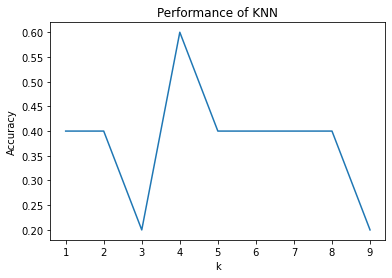

In [8]:
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of KNN")
plt.show()

The model has the highest accuracy for K=4 while it has lowest accuracy for K=3. The aacuracy of the model remains constant for K=5 to K= 8 and then decreases to 0.2 for K=9. So we choose K=4.